強化学習
=======
```{epigraph}
兵に常勢なく水に常形なし

-- 孫子
```

私たちは日常生活で様々な状況に直面し、行動を選択します。
その結果に基づいて次の行動を調整していきます。  
「この行動は良い結果をもたらした」「あの選択は失敗だった」という経験から学習するプロセスは、まさに**強化学習**の考え方そのものです。

強化学習とは、**環境との相互作用**を通じて、**報酬を最大化**するように行動を学習する機械学習の一分野です。
エージェントは行動を選択し、環境から状態と報酬を受け取り、これらの経験に基づいて方策を改善していきます。

強化学習の応用例は多岐にわたります。

- ゲームAIの開発
- ロボット制御
- 自動運転技術
- 推薦システム
- トレーディングアルゴリズム

## 強化学習の基本

強化学習には以下の基本要素があります：

1. **エージェント**：学習し行動する主体
2. **環境**：エージェントが相互作用する外部世界
3. **状態 (S)**：環境の現在の状況
4. **行動 (A)**：エージェントが選択できる選択肢
5. **報酬 (R)**：行動の結果として環境から得られる数値
6. **方策 (Policy)**：各状態でどの行動を選ぶかを決める戦略

強化学習の目標は、将来の報酬の総和（累積報酬）を最大化する最適な方策を見つけることです。

## Q-Learningとは

Q-Learningは、環境と相互作用しながら最適な決定を行うようにエージェントを訓練するためのモデルフリー強化学習アルゴリズムです。
Q-Learningの「Q」は「Quality（質）」を表し、特定の状態で特定の行動をとることの価値（Q値）を学習します。

**モデルフリー**とは、環境のモデル（状態遷移確率や報酬の仕組み）を事前に知らなくても、試行錯誤を通じて学習できるという意味です。

### Q値とQテーブル

Q値は特定の状態で特定の行動をとることの期待報酬を表します。
これらの値はQテーブルに格納され、エージェントの記憶構造として機能します。

Qテーブルの構造：

- 行は状態を表す
- 列は可能な行動を表す
- 各セルには、その状態-行動ペアのQ値が含まれる

エージェントが環境を探索し、相互作用から学習するにつれて、Qテーブルを更新し、意思決定能力を徐々に向上させていきます。

### Q-Learningの更新式

Q-learningの核心は、時間差分（Temporal Difference）更新式です。

```{math}
:label: td-eq
Q(S,A) \leftarrow Q(S,A) + \alpha (R + \gamma \max_{A'} Q(S',A') - Q(S,A))
```

ここで：
- $Q(S,A)$ は状態Sで行動Aをとる現在のQ値
- $\alpha$ （アルファ）は学習率（0～1）で、新しい情報をどの程度Q値に反映させるかを決定します
- $R$ は状態Sで行動Aをとった際に得られる報酬
- $\gamma$ （ガンマ）は割引率（0～1）で、即時報酬と将来の報酬のバランスを取る
- $S'$ はエージェントが次に移動する状態
- $A'$ は状態$S'$での最良の次の行動
- $\max_{A'} Q(S',A')$ は次の状態での最大Q値

この式は、「現在の見積もり」と「新しい情報に基づく見積もり」の差を取り、その一部を現在の見積もりに加えることで、エージェントが徐々にQ値を洗練させる助けとなります。

### 探索と活用のバランス

Q-learningの重要な側面は、探索（より良い戦略を発見するために新しい行動を試す）と活用（既知の良い戦略を使用する）のバランスを取ることです。これは通常、$\epsilon$-greedy方策によって実現されます。

- **活用**：確率$1-\epsilon$で、エージェントは最高のQ値を持つ行動を選択
- **探索**：確率$\epsilon$で、エージェントはランダムな行動を選択

時間の経過とともに、$\epsilon$の値は通常減少し、エージェントが環境についてより多くを学ぶにつれて、探索から活用への移行を可能にします。

## Q-Learningアルゴリズムの実装

簡単な迷路を解くプログラムをQ-Learningで実装してみましょう。
4×4のグリッド上で、スタートからゴールまで最短経路を学習させます。

### 迷路

まずは迷路を定義します。この迷路では

- 0は通路
- 1は壁
- 2はゴール

として表します。

numpyを使って迷路を表現すると以下のようになるでしょう。

In [1]:
import numpy as np

maze = np.array([
    [0, 0, 0, 0],
    [0, 1, 0, 1],
    [0, 0, 0, 0],
    [1, 1, 0, 2]
])

このままだと分かりにくいので、
matplotを使って迷路を可視化してみましょう。

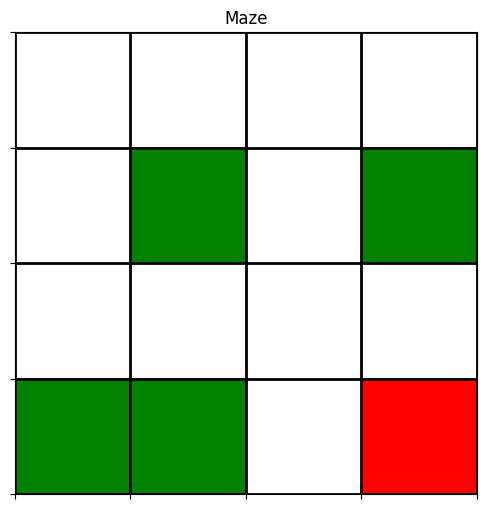

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def render(maze):
    plt.figure(figsize=(6, 6))
    
    # 色分けの設定
    colors = ListedColormap(['white', 'black', 'green', 'red'])
    plt.imshow(maze, cmap=colors)
    
    # グリッド線の表示
    plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    plt.xticks(np.arange(-.5, 4, 1), [])
    plt.yticks(np.arange(-.5, 4, 1), [])
    
    plt.title("Maze")
    plt.show()

render(maze)

このようにして、迷路に対してどんどん関数を追加していくのですが、
このままでは迷路用の関数が増え、プログラムが分かりにくくなっていきます。
そこで、**オブジェクト指向**の考え方を使ってプログラムを作成し、分かりやすくします。

オブジェクト指向プログラミングでは**オブジェクト**を中心としてプログラミングを行います。
オブジェクトとは、データとそれらを操作する関数をまとめて1つにしたものです。

オブジェクト指向の定義は様々ありますが、ここではPythonで提供されている機能

- クラス
- 継承
- カプセル化

を用いて、オブジェクト指向について学びます。

#### オブジェクト指向

**オブジェクト指向プログラミング** (Object-Oriented Programming)で使われる用語

- **クラス (class)**
- **インスタンス (instance)**

について説明します。

プログラムの中で猫のデータを作成したいとします。
それぞれの猫は同じように歩けるし、鳴けます。
猫に共通した部分のコードがクラスとなります。

クラスは設計図のようなもので、それだけでは動く**実体**とはなりません。
そのため、クラスから実体を作る必要があります。
クラスから作成された実体のことを**インスタンス**(instance)または**オブジェクト**(object)といいます。
また、クラスから実体を作ることを**インスタンス化**(instantiation)といいます。

#### クラスの定義

Pythonで猫の設計図を表す`Cat`というクラスを定義してみます。
猫の動作として鳴くメソッド`mew`を定義します。
オブジェクトから呼ばれる関数のことを**メソッド**といいます。

In [3]:
# クラスの定義
class Cat:
  def mew(self):
    print("にゃー")

#インスタンス化
tama = Cat()

#メソッド呼び出し
tama.mew()

にゃー


メソッドの最初の引数は`self`になります。
今回のように引数を必要としないメソッドでも必ずselfが引数として必要になります。
`self`というのは作成されたインスタンス自身を参照するために用いられます。

メソッドはインスタンスから呼び出されるとき自動的に第一引数にそのインスタンスへの参照を渡します。
そのため、メソッドの第一引数は`self`となり、渡されてくる自分自身への参照を受け取るようになっています。
ただし、呼び出す際にはそのインスタンスを引数に指定する必要はありません。

mewに鳴く回数を引数として渡せるようにしてみましょう。

In [4]:
class Cat:
  def mew(self, n):
    print("にゃー"*n)

#インスタンス化
tama = Cat()

#メソッド呼び出し
tama.mew(3)

にゃーにゃーにゃー


例のコードでは猫共通の動作であるmewを定義しましたが、
それぞれの猫が保つ属性（例えば名前など）がありません。

猫が名前を持てるようにしてみます。

In [5]:
class Cat:
  def __init__(self, name):
    self.name = name

  def mew(self, n):
    print("にゃー"*n)

#インスタンス化
my_cat = Cat('タマ')
tibi = Cat('チビ')

print(my_cat.name)
print(tibi.name)

my_cat.mew(3)
tibi.mew(5)

タマ
チビ
にゃーにゃーにゃー
にゃーにゃーにゃーにゃーにゃー


`Cat`というクラスの`__init__()`メソッドに、`'タマ'`という文字列を渡しています。
`my_cat`が、`Cat`クラスから作成されたインスタンスです。

`__init__()`メソッドは特別なメソッドで、クラスがインスタンス化されるときに必ず呼ばれます。

`self.name`はそのクラスの属性で、どのメソッドからも参照できます。

#### 継承

**継承**(inheritance)を使うと、あるクラスの一部の機能を変更したり、新しい機能を付け足したりできるようになります。

例として、`R`というクラスを定義し、そのクラスを継承した`SR`という新しいクラスを作ってみましょう。

`R`クラスを定義します。

In [6]:
class R:
    def __init__(self):
        self.a = 1
        self.b = 2

`R`というクラスは、インスタンス化を行う際に引数をとりませんが、
属性として`a`と`b`の2つの変数を保持し、それぞれには`__init__()`メソッドで`1`と`2`という値が代入されます。

次に、このクラスを継承する`SR`クラスを定義します。
継承を行う場合は、クラス定義の際にクラス名に続けて`()`を書き、その中に継承したいクラスの名前を書きます。
`()`の中に書かれたクラスは、定義されるクラスの親クラスといいます。
それに対し、`()`の中に書かれたクラスからすると、定義されるクラスは子クラスとなります。

In [7]:
class SR(R):
    def sum(self):
        return self.a + self.b

`SR`クラスは `__init__()`メソッドの定義がありません。
`__init__()`メソッドが定義されていない場合は、親クラスの`__init__()`メソッドが自動的に呼び出されます。
そのため、`SR` クラスでは一見何も属性を定義していないように見えますが、
インスタンス化を行うと親クラスである`R`の`__init__()`メソッドが自動的に実行され、`a`、`b` という属性が定義されます。
以下のコードで動きを確認してみましょう。

In [8]:
c = SR()
print(c.a, c.b)
print(c.sum())

1 2
3


このように、親クラスを継承し、新しい機能が追加された新しいクラスを定義できるようになります。
継承を使えば、既存のクラスの差分を簡単に作れます。

この`SR`というクラスにも`__init__()`メソッドを定義し、新しい属性`c`を定義しましょう。
`sum()`メソッドでは親クラスの `a`、`b`という属性と、新たな`c`という属性の3つの和を返すように変更します。

In [9]:
class SR(R):
    def __init__(self):
        self.c = 5  # self.c を新たに追加
    
    def sum(self):
        return self.a + self.b + self.c

# インスタンス化
c = SR()
try:
    c.sum()
except Exception as e:
    print(e)

'SR' object has no attribute 'a'


`c.sum()`の部分でエラーが出るのですが、そのままだと分かりずらいので、try-except文を使ってエラーを表示しています。

try-except文は
```python
try:
    # エラーが発生する可能性のある処理
except エラーの種類:
    # エラーが発生したときの処理
```
という書き方をします。

エラーメッセージを読んでみましょう。

エラーには「`'SR'` というオブジェクトは`'a'` という名前の属性を持っていない」と書いてあります。
`a` という属性は、`SR`の親クラスである`R`の`__init__()`メソッドで定義されています。
そのため、`SR`クラスをインスタンス化する際に、
親クラスである`R`の`__init__()`メソッドが呼ばれているのであれば、
このエラーは起こらないはずです。

`SR`クラスにも`__init__()`メソッドを定義したため、
親クラスである`R`の`__init__()`メソッドが上書きされてしまい、
実行されなかったことがエラーの原因です。

親クラスの`__init__()`メソッドを明示的に呼べば、このエラーは解決できます。
それには、`super()`という組み込み関数を用います。
この関数を使うと、子クラスから親クラスを参照できるようになります。

In [10]:
class SR(R):
    def __init__(self):
        # 親クラスの `__init__()` メソッドを呼び出す
        super().__init__()
        
        # self.c を新たに追加
        self.c = 5
    
    def sum(self):
        return self.a + self.b + self.c

# インスタンス化
c = SR()
c.sum()

8

今回は実行できましたね。
`SR`クラスの`__init__()`メソッドの最初で、親クラスの`__init__()`メソッドを実行し、
`a`、`b`という属性を定義しているため、エラーは起きなくなっています。

あるクラスを継承して作られたクラスを、さらに継承して別のクラスを定義できます。

In [11]:
class SSR(SR):
    
    def mul(self):
        return self.a * self.b * self.c

`SSR`クラスは、`R`クラスを継承した`SR`クラスをさらに継承したクラスで、
`a`、`b`、`c`という3つの属性を掛け合わせた結果を返す`mul()`というメソッドを持ちます。

このクラスのインスタンスを作成し、`mul()`を実行してみましょう。

In [12]:
c = SSR()
print(c.mul())
print(c.sum()) #もちろんこれもできる

10
8


#### カプセル化

カプセル化とは、操作とその操作に関連するデータをまとめることをいいます。

Personという人間を表すクラスをつかって考えてみましょう。

In [13]:
class Person:
  def __init__(self, name, hight, weight):
    self.name = name
    self.hight = hight
    self.weight = weight
  
  def check(self):
    print(f"{self.name} - {self.hight}cm {self.weight}kg")

k = Person('Tanjiro', 165, 61)

k.check()

Tanjiro - 165cm 61kg


このクラスにBMIを計算するメソッドを追加してみます。

In [14]:
class Person:
  def __init__(self, name, hight, weight):
    self.name = name
    self.hight = hight
    self.weight = weight
  
  def check(self):
    print(f"{self.name} - {self.hight}cm {self.weight}kg")
  
  def bmi(self):
    return self.weight / (self.hight / 100.) ** 2

k = Person('Tanjiro', 165, 61)

k.bmi()

22.4058769513315

このように、関連するデータ（クラスの属性）を使うメソッドをまとめたものがクラスになっていると考えても良いでしょう。

データの属性やメソッドへのアクセスをさせたくない場合は、_を属性の名前やメソッドの名前の前に２つ付けます。

In [15]:
class Person:
  def __init__(self, name, hight, weight):
    self.name = name
    self.hight = hight
    self.__weight = weight
  
  def check(self):
    print(f"{self.name} - {self.hight}cm {self.__weight}kg")
  
  def __bmi(self):
    return self.weight / (self.hight / 100.) ** 2

k = Person('Tanjiro', 165, 61)

k.check()
## print(k.__weight) #コメントアウトしてエラーが出ることを確認

Tanjiro - 165cm 61kg


#### 迷路のクラス化

では、迷路をクラスで書いてみます。

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap

class MazeEnvironment:
    def __init__(self, start=(2, 0)):
        # 0: 通路, 1: 壁, 2: ゴール
        self.maze = np.array([
            [0, 0, 0, 0],
            [0, 1, 0, 1],
            [0, 0, 0, 0],
            [1, 1, 0, 2]
        ])
        self.start_state = start  # スタート位置
        self.current_state = self.start_state
        self.goal_state = (3, 3)  # ゴール位置
        self.actions = ["up", "right", "down", "left"]
        
    def reset(self):
        self.current_state = self.start_state
        return self.current_state
    
    def step(self, action):
        i, j = self.current_state
        
        # 行動に基づいて次の状態を計算
        if action == "up" and i > 0:
            next_state = (i-1, j)
        elif action == "right" and j < 3:
            next_state = (i, j+1)
        elif action == "down" and i < 3:
            next_state = (i+1, j)
        elif action == "left" and j > 0:
            next_state = (i, j-1)
        else:
            next_state = (i, j)
            
        # 壁に当たった場合は移動しない
        next_i, next_j = next_state
        if self.maze[next_i, next_j] == 1:
            next_state = (i, j)
            
        self.current_state = next_state
        
        if next_state == self.goal_state:
            reward = 100  # ゴールに到達した場合の報酬
            done = True
        else:
            reward = -1  # 各ステップのペナルティ
            done = False
            
        return next_state, reward, done

この迷路環境クラスでは、迷路の状態だけでなく、
エージェントが取れる行動（上、右、下、左）と、それに対する状態遷移、報酬の計算を定義しています。
ゴールに到達すると大きな報酬（+100）を得られますが、
それ以外の各ステップでは小さなペナルティ（`-1`）を受けるため、
エージェントには最短経路を見つける動機が生まれます。

### 環境の可視化

迷路や学習状況を視覚化するための関数を追加します。
今回は関数として実装しましたが、迷路環境クラスにメソッドとして定義した方が良いでしょう。

In [17]:
def render(maze):
    # 迷路の可視化
    plt.figure(figsize=(6, 6))
    
    # 色分けの設定
    colors = ListedColormap(['white', 'black', 'green', 'red'])
    plt.imshow(maze.maze, cmap=colors)
    
    # グリッド線の表示
    plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    plt.xticks(np.arange(-.5, 4, 1), [])
    plt.yticks(np.arange(-.5, 4, 1), [])
    
    # 現在位置の表示
    i, j = maze.current_state
    plt.plot(j, i, 'bo', markersize=15)
    
    plt.title("Maze Environment")
    plt.show()

実際に迷路を可視化してみましょう。
このプログラムを実行すると、迷路の初期状態が表示されます。

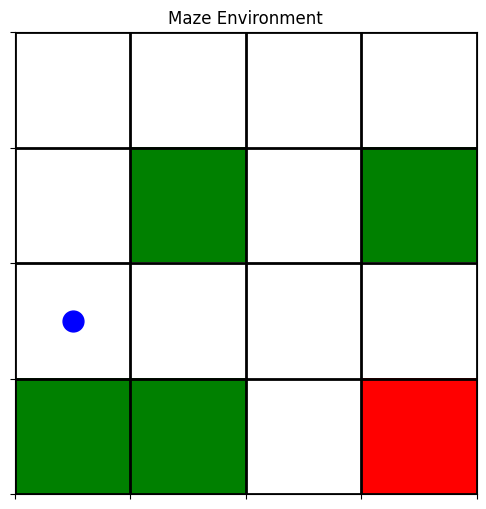

In [18]:
env = MazeEnvironment()
render(env)

青い点がエージェントの位置になります。
次に、このエージェントを上に動かし、その結果を見てみましょう。

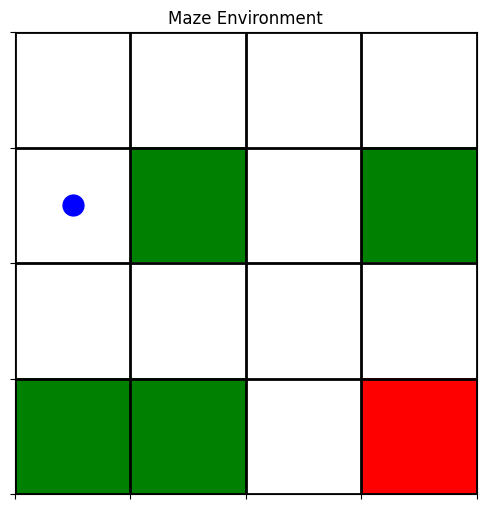

In [19]:
env.step("up")
render(env)

エージェントが上に動いた結果を確認できましたね。
迷路環境をクラスで定義しているので、操作に集中でき、プログラムが簡潔で分かりやすくなっています。

### Q学習アルゴリズムの実装

Q学習のアルゴリズムを実装します。

q_tableは、状態と行動のペアをキーとして、Q値を格納する辞書になります。
また、初期値は全て0にしておきます。

In [20]:
q_table = {}
# Q-tableの初期化
for i in range(4):
    for j in range(4):
        for a in ["up", "right", "down", "left"]:
            q_table[((i, j), a)] = 0

Q-Learningのアルゴリズムを実装します。

In [21]:
def q_learning(env, q_table, learning_rate=0.1, discount_factor=0.95, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01, num_episodes=1000):
    actions = ["up", "right", "down", "left"]
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        steps = 0
        done = False
        
        while not done:
            # 行動選択（ε-greedy方策）
            if random.uniform(0, 1) < epsilon:
                action = random.choice(actions)
            else:
                q_values = [q_table[(state, a)] for a in actions]
                action = actions[np.argmax(q_values)]
                        
            # 行動を実行し、次の状態と報酬を観測
            next_state, reward, done = env.step(action)
            
            # Q値の更新
            old_q_value = q_table[(state, action)]
            next_max_q = max([q_table[(next_state, a)] for a in actions])
            
            new_q_value = old_q_value + learning_rate * (reward + discount_factor * next_max_q - old_q_value)
            q_table[(state, action)] = new_q_value
            
            # 状態を更新
            state = next_state
            steps += 1
            
            if steps > 100:  # 無限ループ防止
                break
                
        epsilon = max(epsilon_min, epsilon * epsilon_decay)        

`q_learning`関数は、Q-Learningのアルゴリズムを実装しています。
引数は

- `env`: 環境
- `q_table`: Qテーブル
- `learning_rate`: 学習率
- `discount_factor`: 割引率
- `epsilon`: ε-greedyパラメータ
- `epsilon_decay`: εの減衰率
- `epsilon_min`: εの最小値
- `num_episodes`: エピソード数

を受け取ります。
環境とQテーブルは必須で、それ以外はデフォルト値を設定しています。
学習率0.1、割引率0.95を使用しています。
学習率が小さいほど慎重に学習し、大きいほど新しい情報を強く反映します。
割引率が大きいほど将来の報酬を重視します。

21-25行目は、Q値の更新式{eq}`td-eq`に対応しています。

では実際に学習して、start地点のQ値を見てみましょう。

In [22]:
env = MazeEnvironment()
q_learning(env, q_table)
for a in env.actions:
    print(f"{a}: {q_table[(env.start_state, a)]}")

up: 72.7289771353598
right: 82.88499999999976
down: 77.71161270081198
left: 77.6246922574079


Q値の結果から、start地点からは右に行くと良さそうですね。

### 学習した方策

学習したQ値を使って、エージェントに最適な経路をたどらせてみましょう。

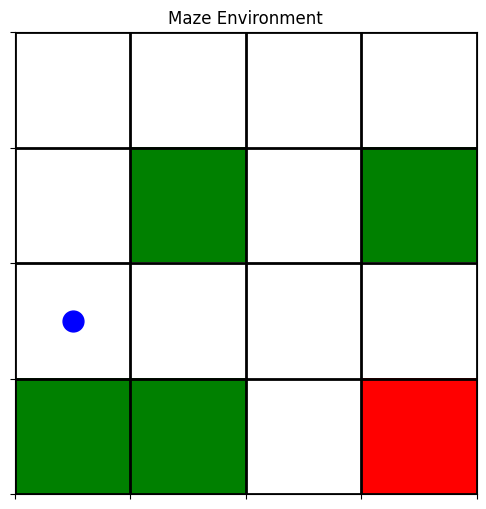

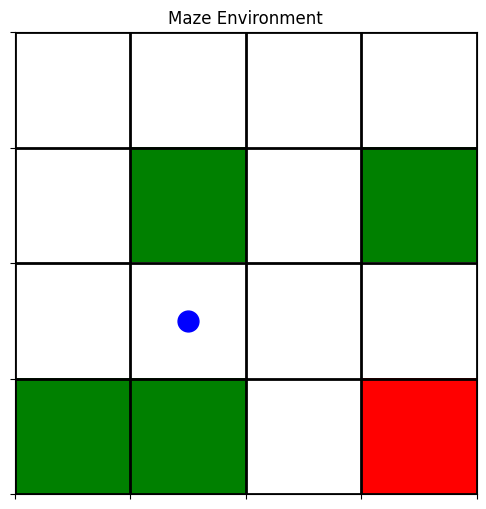

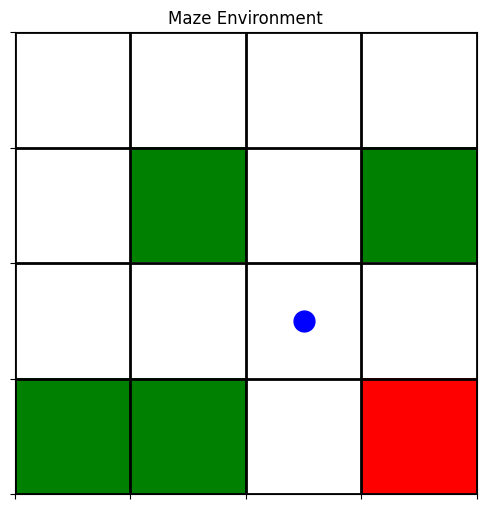

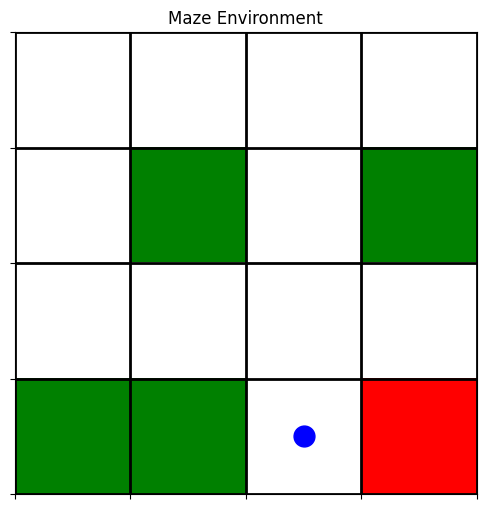

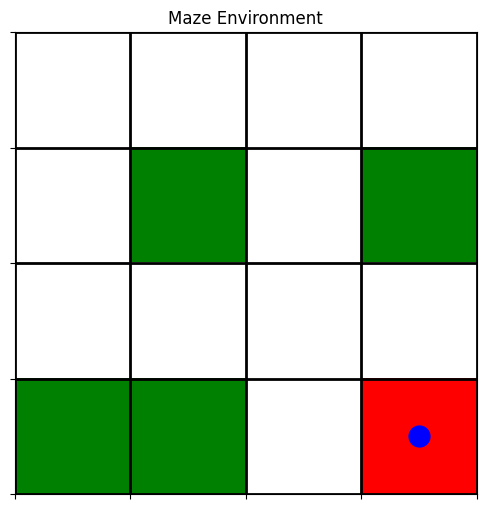

In [23]:
state = env.reset()
path = [state]
done = False

render(env)

while not done and len(path) < 20:
    q_values = [q_table[(state, a)] for a in env.actions]
    action = env.actions[np.argmax(q_values)]

    next_state, _, done = env.step(action)

    path.append(next_state)

    render(env)

    state = next_state

ちゃんとゴールに到達していますね。

- Q-tableの初期値を`random`にしてみましょう。
- 各マスでQ値が大きいほうに矢印を表示してみましょう。